<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bibliotecas" data-toc-modified-id="Bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bibliotecas</a></span></li><li><span><a href="#Cenário-Econômico" data-toc-modified-id="Cenário-Econômico-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cenário Econômico</a></span></li><li><span><a href="#Valor-adicionado-por-setor" data-toc-modified-id="Valor-adicionado-por-setor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Valor adicionado por setor</a></span></li><li><span><a href="#Agropecuária-em-Valores" data-toc-modified-id="Agropecuária-em-Valores-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Agropecuária em Valores</a></span></li><li><span><a href="#Agropecuária-em-Valores" data-toc-modified-id="Agropecuária-em-Valores-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Agropecuária em Valores</a></span></li><li><span><a href="#Mensurando-toda-a-cadeia-do-Agronegócios" data-toc-modified-id="Mensurando-toda-a-cadeia-do-Agronegócios-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mensurando toda a cadeia do Agronegócios</a></span></li><li><span><a href="#Produtividade-Agropecuária" data-toc-modified-id="Produtividade-Agropecuária-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Produtividade Agropecuária</a></span></li></ul></div>

## Bibliotecas

In [8]:
import pandas as pd

**Séries do Banco Central do Brasil**

In [9]:
import sgs

**Séries do Banco Central do ipeadata**

In [10]:
import ipeadatapy as ipea

**Pacotes de visualização**

In [11]:
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import itertools
from itertools import product
from plotly.offline import iplot
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()

**Geo**

In [12]:
import geopandas as gpd
from libpysal.weights.contiguity import Queen
import libpysal
from libpysal import examples
import pygeoda
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
from splot.libpysal import plot_spatial_weights

## Cenário Econômico

Fonte: SGS Banco Central do Brasil

Nestes dois primeiros Capítulos foram plotadas informações macro econômicas sobre a perspectiva do setor agropecuário. Para analisar o cenário econômico foram utilizadas séries do IBGE do repositório SGS do Banco Central do Brasil, obtidos através de API.

In [22]:
series = [7326]
labels = ['PIB_variação_real_ano']
data_inicial ='31-12-1962'
data_final = '31-12-2020'
PIB_variação= sgs.dataframe(series, start= data_inicial, end=data_final)
PIB_variação= PIB_variação.rename(columns={s:l for s, l in zip(series, labels)})

In [23]:
cores = []
for x in PIB_variação['PIB_variação_real_ano']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [24]:
data = [go.Bar(x=PIB_variação.index,
               y=PIB_variação['PIB_variação_real_ano'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação real anual do PIB',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

In [25]:
series = [4380]
labels = ['PIB_valores']
data_inicial ='31-12-1990'
data_final = '31-12-2020'
PIB_valores = sgs.dataframe(series, start= data_inicial, end=data_final)
PIB_valores = PIB_valores.rename(columns={s:l for s, l in zip(series, labels)})

In [26]:
PIB_valores['PIB_valores']=PIB_valores['PIB_valores']/100000
PIB_valores.iplot(kind='bar', color='Darkblue', title='PIB Mensal em valores correntes em trilhões de reais')

In [27]:
series = [7327,7329,7328]
labels = ['PIB_agro','PIB_serviços','PIB_indústria']
data_inicial ='01-01-2015'
data_final = '31-12-2020'
PIB_setor = sgs.dataframe(series, start= data_inicial, end=data_final)
PIB_setor= PIB_setor.rename(columns={s:l for s, l in zip(series, labels)})

In [28]:
PIB_setor.head()

,PIB_agro,PIB_serviços,PIB_indústria
2015-01-01,3.31,-2.73,-5.76
2016-01-01,-5.22,-2.22,-4.57
2017-01-01,14.15,0.77,-0.50
2018-01-01,1.31,2.09,0.72
2019-01-01,0.63,1.66,0.37


In [29]:
cores = []
for x in PIB_setor['PIB_agro']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [30]:
data = [go.Bar(x=PIB_setor.index,
               y=PIB_setor['PIB_agro'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação anual do PIB da Agropecuária',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

In [31]:
cores = []
for x in PIB_setor['PIB_serviços']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [32]:
data = [go.Bar(x=PIB_setor.index,
               y=PIB_setor['PIB_serviços'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação anual do PIB da Serviços',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

In [33]:
cores = []
for x in PIB_setor['PIB_indústria']:
    if x < 0:
        cores.append('red')
    else:
        cores.append('blue')

In [34]:
data = [go.Bar(x=PIB_setor.index,
               y=PIB_setor['PIB_indústria'],
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.9
              )
       ]
configuracoes_layout = go.Layout(title='Variação anual do PIB da Indústria',
                                 yaxis={'title':'Variação percentual'},
                                 xaxis={'title':'Período'})
fig = go.Figure(data=data, layout=configuracoes_layout)
py.iplot(fig)

## Valor adicionado por setor

## Agropecuária em Valores

Fonte: Ipea Data via API do pacote ipeadatapy

In [15]:
pib_agro2=ipea.timeseries('SCN10_VAAGRON10',yearGreaterThan=1990)

In [21]:
pib_agro2['VALUE (R$)'].iplot(kind='bar',color='green', title= 'PIB agropecuária anual')

- Esta mesma série foi deflacionada pelo IPCA ( IPEADATA também trás disponível a série deflacionada)

In [86]:
agro_deflat=pd.read_csv('C:/Users/agend/Desktop/Estudo Agro/bases/pib_agro_valores.csv', sep=';', encoding='latin-1')[['DATA', 'Nominal', 'Real']]
agro_deflat=agro_deflat.set_index(['DATA'])

In [88]:
agro_deflat.iplot(title='PIB-Valor Adicionado Agropecuária- correção pelo IPCA de Março de 2021')

- Já os mapas foram retirados do shape file fornecido pelo IBGE no Censo Agropecuário neste endereço: https://mapasinterativos.ibge.gov.br/agrocompara/

In [38]:
shape=gpd.read_file('C:/Users/agend/Desktop/Estudo_virtual/mun_agro.shp')
shape.head(2)

,OBJECTID,MUNICIPIO,Shape_Leng,Shape_Area,V1,V2,V3,V4,V5,V6,...,V34,V35,V36,V37,V38,V39,OLS_PREDIC,OLS_RESIDU,CL,geometry
0,1,b'Lupion\xf3polis - PR',0.514701,0.010596,173.0,59.7001,3.23121,165.7380,852.3680,124.304,...,48.5549,8.58624,8.09249,68.7861,71.0983,36.9942,124.402012,-64.701912,1.0,"POLYGON ((-51.63021 -22.66372, -51.63011 -22.6..."
1,2,b'\xc1guas de Lind\xf3ia - SP',0.344094,0.004856,69.0,28.4016,3.42029,36.3902,80.0584,133.431,...,39.1304,2.43528,13.04350,49.2754,60.8696,46.3768,93.397002,-64.995402,1.0,"POLYGON ((-46.61019 -22.43936, -46.60345 -22.4..."


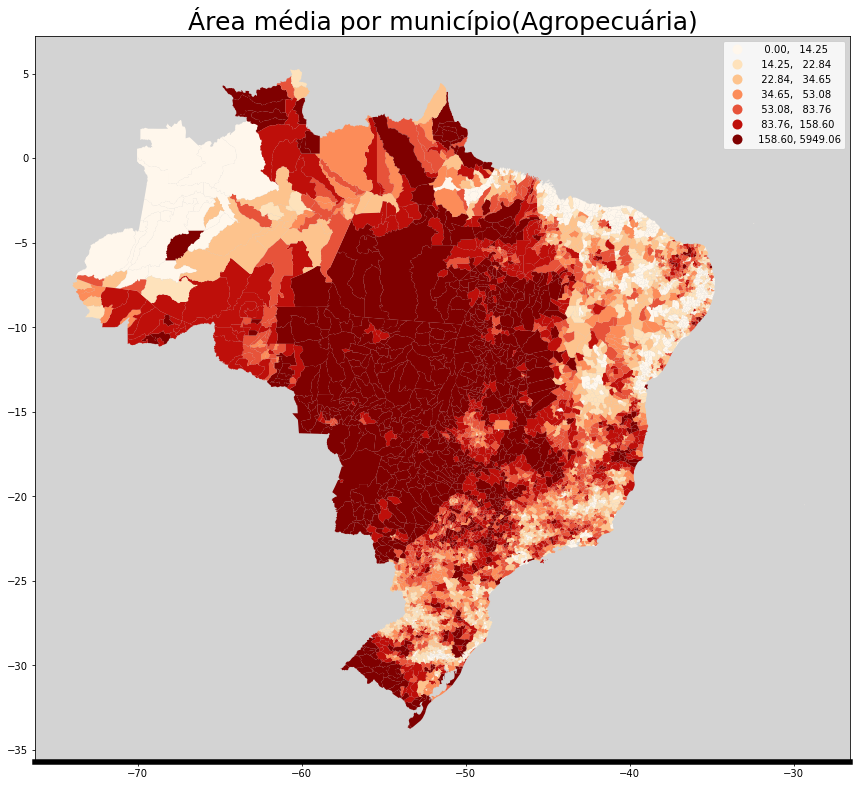

In [39]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
shape.plot(column='V2', scheme='Quantiles', k=7,cmap='OrRd',legend=True, ax=ax),ax.set_title("Área média por município(Agropecuária)", fontdict={'fontsize':25}),ax.set_xlabel(' ', fontdict={'fontsize':20}),ax.set_facecolor('lightgrey'),ax.spines['bottom'].set_linewidth(5.5)
fig.tight_layout()

In [41]:
regioes=pd.read_csv("C:/Users/agend/Desktop/Estudo Agro/bases/regioes_agro.csv", sep = ";", encoding='latin-1')
mapa=pd.merge(shape,regioes,on=['OBJECTID'],how='left')

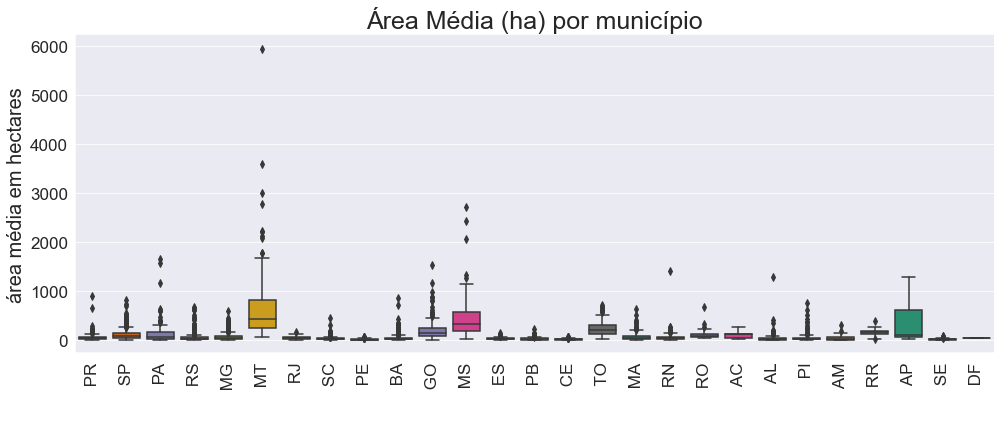

In [62]:
gráfico=mapa
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style('darkgrid'),sns.boxplot(x=gráfico['Estado'], y=gráfico['V2'], ax=ax,data=gráfico,palette="Dark2"),ax.set_title("Área Média (ha) por município", fontdict={'fontsize':25}),ax.spines['bottom'].set_linewidth(5.5),ax.tick_params(labelsize=20),plt.xticks(rotation=90, size=17),plt.yticks(rotation=0, size=17),ax.set_ylabel('área média em hectares', fontdict={'fontsize':20}),ax.set_xlabel(' ', fontdict={'fontsize':20})
fig.tight_layout()

In [72]:
area_por_estado=mapa.groupby(['Estado', 'Região']).sum()[['V2']].reset_index()
area_por_estado=area_por_estado.sort_values(ascending=False, by='V2')

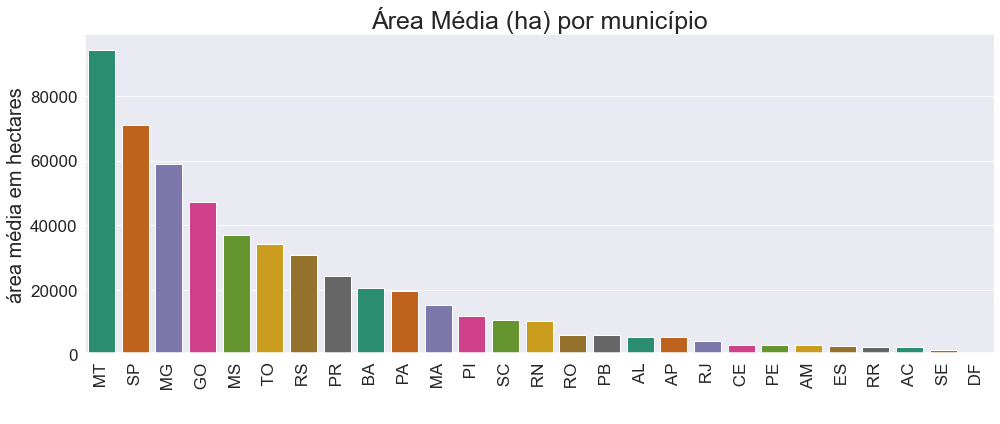

In [71]:
gráfico=area_por_estado
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style('darkgrid'),sns.barplot(x=gráfico['Estado'], y=gráfico['V2'], ax=ax,data=gráfico,palette="Dark2"),ax.set_title("Área Média (ha) por município", fontdict={'fontsize':25}),ax.spines['bottom'].set_linewidth(5.5),ax.tick_params(labelsize=20),plt.xticks(rotation=90, size=17),plt.yticks(rotation=0, size=17),ax.set_ylabel('área média em hectares', fontdict={'fontsize':20}),ax.set_xlabel(' ', fontdict={'fontsize':20})
fig.tight_layout()

- Já a série trimestral foi obtida do SGS do Banco Central, através da API 

In [47]:
series_VA = [22105,22106,22107,22110]
labels_VA = ['PIB_Agropecuária','PIB_Indústria','PIB_serviços','Consumo_das_famílias']
data_inicial ='01-01-1996'
data_final = '01-01-2021'
Valor_adicionado_por_setor = sgs.dataframe(series_VA, start= data_inicial, end=data_final)
Valor_adicionado_por_setor = Valor_adicionado_por_setor.rename(columns={s:l for s, l in zip(series_VA, labels_VA)})

In [48]:
Valor_adicionado_por_setor.head()

,PIB_Agropecuária,PIB_Indústria,PIB_serviços,Consumo_das_famílias
1996-01-01,95.12,100.69,100.80,98.86
1996-04-01,96.59,97.05,102.31,100.93
1996-07-01,101.69,105.99,103.69,103.70
1996-10-01,126.16,99.54,101.56,109.13
1997-01-01,101.74,104.25,103.86,106.65


In [49]:
Valor_adicionado_por_setor.iplot(title= 'PIB Trimestral por Setor- Dados dessazonalizados')

## Agropecuária em Valores

## Mensurando toda a cadeia do Agronegócios

## Produtividade Agropecuária